# Predict the onset of diabetes based on diagnostic measures using ANN
In this exercise we will build a simple ANN for a binary classification problem.   
Kaggle API command to download dataset:     
`kaggle datasets download -d uciml/pima-indians-diabetes-database`

Or Download from here: [https://www.kaggle.com/uciml/pima-indians-diabetes-database/data](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data)

[warning] the codes use Tensorflow 2.0.0 and Keras 2.3.1

In [1]:
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers

Using TensorFlow backend.


In [2]:
filename = 'data/diabetes.csv' #this is specific to my case. use your own path to the data

df = pd.read_csv(filename)
df.head() #shows the first 5 lines of your data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info() #shows attributes and their properties. seems there is no null value nor wrong data type such as string value for numbers which sometimes happens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Create X and Y in numpy array format from pandas dataframe 
Y = np.array(df['Outcome'])
X = np.array(df.drop('Outcome',axis=1))

In [5]:
# Check the X and Y shapes 
print(X.shape, Y.shape)

(768, 8) (768,)


In [6]:
# YOUR TURN
# Split the dataset to train and test set with the ratio of 80% train and 20% test
# hint : use sklearn train_test_split()
# use naming as X_train, Y_train for train data and X_test, Y_test for test data.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check (print) the data shape for each
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## Build a simple Keras model

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It can work with various software and hardware platforms. You can build and train neural network models easily without having to worry about how to handle those specific software/hardware platforms. For more info, see [Keras documentation](https://keras.io/).

We'll use the `Sequential()` model in Keras. 
The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor.


```python
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
```
`input_shape=(784,)` means the data has 784 features (Just ignore this number for now).  
Or alternatively, you can add layers using .add() method to the layers object `model`.
```python
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
```
This works too.
```python
l1 = Dense(32,input_dim=784)
l2 = Activation('relu')

model = Sequential([l1,l2])
```
You can wrap it in a function.
```python
def mymodel():
    model=Sequential()
    model.add(Dense(32,input_dim=784))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    return model
```

For more info, see [About Keras Sequential Model](https://keras.io/getting-started/sequential-model-guide/).

In [7]:
# YOUR TURN
# build a model with 3 hidden layers (the first hidden layer is already given) and the output layer to classify (binary)
# which activation functions should you use for hidden layers and the output layer?

model = Sequential()
model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# prints out the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile your model
# we use binary cross entropy since this problem is a binary classification problem. 
# let's add accuracy metric to display 
# we use adam optimizer (let's not worry about what is it for now. it's easier to use than other optimizers)
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [10]:
# YOUR TURN
# Fit your model on the train data using batch size 32 and for 20 epochs
# hint: use model.fit() function

model.fit(X_train, Y_train, batch_size=32, epochs=20)

Epoch 1/20
614/614 [==============================] - 0s 194us/step - loss: 2.1999 - accuracy: 0.5554
Epoch 2/20
614/614 [==============================] - 0s 48us/step - loss: 0.9568 - accuracy: 0.5879
Epoch 3/20
614/614 [==============================] - 0s 51us/step - loss: 0.7467 - accuracy: 0.6010
Epoch 4/20
614/614 [==============================] - 0s 54us/step - loss: 0.6798 - accuracy: 0.6319
Epoch 5/20
614/614 [==============================] - 0s 52us/step - loss: 0.7592 - accuracy: 0.6156
Epoch 6/20
614/614 [==============================] - 0s 52us/step - loss: 0.6748 - accuracy: 0.6547
Epoch 7/20
614/614 [==============================] - 0s 53us/step - loss: 0.6226 - accuracy: 0.6515
Epoch 8/20
614/614 [==============================] - 0s 54us/step - loss: 0.6183 - accuracy: 0.6743
Epoch 9/20
614/614 [==============================] - 0s 56us/step - loss: 0.6006 - accuracy: 0.6808
Epoch 10/20
614/614 [==============================] - 0s 56us/step - loss: 0.6110 - accur

In [11]:
# YOUR TURN

# Q1. What was the best accuracy from the above result?
# >> about 0.7 or more

# Q2. What happens if you change epochs? What is your optimal epochs?
# your answer:
# >> the training accuracy continues to go up (see below experiment). 
# >> But without testing a holding out set, I can't tell whether it's overfitting.



In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
614/614 [==============================] - 0s 48us/step - loss: 0.5726 - accuracy: 0.7101
Epoch 2/100
614/614 [==============================] - 0s 50us/step - loss: 0.5874 - accuracy: 0.6873
Epoch 3/100
614/614 [==============================] - 0s 53us/step - loss: 0.5734 - accuracy: 0.6971
Epoch 4/100
614/614 [==============================] - 0s 50us/step - loss: 0.5707 - accuracy: 0.6873
Epoch 5/100
614/614 [==============================] - 0s 60us/step - loss: 0.5480 - accuracy: 0.7101
Epoch 6/100
614/614 [==============================] - 0s 48us/step - loss: 0.5532 - accuracy: 0.7036
Epoch 7/100
614/614 [==============================] - 0s 59us/step - loss: 0.5508 - accuracy: 0.7085
Epoch 8/100
614/614 [==============================] - 0s 44us/step - loss: 0.5525 - accuracy: 0.7052
Epoch 9/100
614/614 [==============================] - 0s 50us/step - loss: 0.5861 - accuracy: 0.7020
Epoch 10/100
614/614 [==============================] - 0s 46us/step - loss: 0.542

614/614 [==============================] - 0s 34us/step - loss: 0.5008 - accuracy: 0.7541
Epoch 81/100
614/614 [==============================] - 0s 37us/step - loss: 0.4950 - accuracy: 0.7508
Epoch 82/100
614/614 [==============================] - 0s 36us/step - loss: 0.4934 - accuracy: 0.7443
Epoch 83/100
614/614 [==============================] - 0s 35us/step - loss: 0.4849 - accuracy: 0.7557
Epoch 84/100
614/614 [==============================] - 0s 35us/step - loss: 0.4942 - accuracy: 0.7508
Epoch 85/100
614/614 [==============================] - 0s 35us/step - loss: 0.4800 - accuracy: 0.7752
Epoch 86/100
614/614 [==============================] - 0s 35us/step - loss: 0.4770 - accuracy: 0.7671
Epoch 87/100
614/614 [==============================] - 0s 37us/step - loss: 0.4957 - accuracy: 0.7622
Epoch 88/100
614/614 [==============================] - 0s 37us/step - loss: 0.4859 - accuracy: 0.7573
Epoch 89/100
614/614 [==============================] - 0s 36us/step - loss: 0.4768 - 

## Have more control over your model hyperparameters
Above example showed how to build a sequential model. As you might know already from machine learning, learning rate is an important hyperparameter for taining. In the above example, `.compile()` used the Adam optimizer by calling the optimizer name `'adam'` (string).  
```python
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])
```
Under the hood, if you call the string 'adam', it calls the optimizer Adam (keras.optimizers.Adam) and uses default options (e.g. learning rate is 0.001). Check the [optimizer](https://keras.io/optimizers/) documentation for more details. Since we'd like to control the learning rate, we can instantiate an adam optimizer (and change the learning rate) by
```python
adam = optimizers.Adam(lr=0.005)
```
and use in the `.compile()` 

In [23]:
# YOUR TURN
# instantiate your previous model again without compiling yet,
model = Sequential()
model.add(Dense(16,input_shape=(8,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# instantiate your adam optimizer and change the learning rate to 0.01 and compile
adam = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])

# Note: it's a good idea to wrap models in a function, especially working with jupyter notebook because running cells here and there can mess up.

In [24]:
# YOUR TURN
# fit the model
model.fit(X_train, Y_train, batch_size=32, epochs=200)

Epoch 1/200
614/614 [==============================] - 0s 191us/step - loss: 1.3082 - accuracy: 0.5928
Epoch 2/200
614/614 [==============================] - 0s 40us/step - loss: 0.6553 - accuracy: 0.6482
Epoch 3/200
614/614 [==============================] - 0s 50us/step - loss: 0.6970 - accuracy: 0.6482
Epoch 4/200
614/614 [==============================] - 0s 41us/step - loss: 0.7086 - accuracy: 0.6270
Epoch 5/200
614/614 [==============================] - 0s 40us/step - loss: 0.6209 - accuracy: 0.6694
Epoch 6/200
614/614 [==============================] - 0s 49us/step - loss: 0.5875 - accuracy: 0.6906
Epoch 7/200
614/614 [==============================] - 0s 44us/step - loss: 0.5885 - accuracy: 0.6775
Epoch 8/200
614/614 [==============================] - 0s 46us/step - loss: 0.5605 - accuracy: 0.7068
Epoch 9/200
614/614 [==============================] - 0s 43us/step - loss: 0.5944 - accuracy: 0.6792
Epoch 10/200
614/614 [==============================] - 0s 44us/step - loss: 0.61

614/614 [==============================] - 0s 44us/step - loss: 0.4697 - accuracy: 0.7557
Epoch 81/200
614/614 [==============================] - 0s 54us/step - loss: 0.4559 - accuracy: 0.7997
Epoch 82/200
614/614 [==============================] - 0s 49us/step - loss: 0.4596 - accuracy: 0.7687
Epoch 83/200
614/614 [==============================] - 0s 38us/step - loss: 0.4657 - accuracy: 0.7769
Epoch 84/200
614/614 [==============================] - 0s 43us/step - loss: 0.4480 - accuracy: 0.7915
Epoch 85/200
614/614 [==============================] - 0s 37us/step - loss: 0.4739 - accuracy: 0.7671
Epoch 86/200
614/614 [==============================] - 0s 37us/step - loss: 0.4450 - accuracy: 0.7801
Epoch 87/200
614/614 [==============================] - 0s 35us/step - loss: 0.4474 - accuracy: 0.7818
Epoch 88/200
614/614 [==============================] - 0s 40us/step - loss: 0.4569 - accuracy: 0.7769
Epoch 89/200
614/614 [==============================] - 0s 40us/step - loss: 0.4362 - 

614/614 [==============================] - 0s 40us/step - loss: 0.4134 - accuracy: 0.7948
Epoch 159/200
614/614 [==============================] - 0s 36us/step - loss: 0.4411 - accuracy: 0.7932
Epoch 160/200
614/614 [==============================] - 0s 41us/step - loss: 0.4395 - accuracy: 0.7752
Epoch 161/200
614/614 [==============================] - 0s 40us/step - loss: 0.4289 - accuracy: 0.7899
Epoch 162/200
614/614 [==============================] - 0s 40us/step - loss: 0.4338 - accuracy: 0.7964
Epoch 163/200
614/614 [==============================] - 0s 44us/step - loss: 0.4160 - accuracy: 0.8046
Epoch 164/200
614/614 [==============================] - 0s 40us/step - loss: 0.4234 - accuracy: 0.7948
Epoch 165/200
614/614 [==============================] - 0s 37us/step - loss: 0.4474 - accuracy: 0.7687
Epoch 166/200
614/614 [==============================] - 0s 38us/step - loss: 0.4132 - accuracy: 0.7948
Epoch 167/200
614/614 [==============================] - 0s 37us/step - loss: 

In [ ]:
# YOUR TURN

# Using your model(s) above, tweak learning rate, epoch, and batch size
# Q3. Observe the relationship between the learning rate and epoch. 
# Q3a. If you reduce the learning rate, what happens to the epochs needed to achieve the same accuracy?
# >> In general, I need longer epochs to reach the same accuracy
# >> But if my learning rate is already too big, longer epochs makes worse result
# Q3b. If you increase the learning rate, at some point does it fail?
# >> Seems too high learning rate (higher than 0.01) makes less performance
# Q3c. Find a sweet spot (may not be unique)
# >> lr around 0.001 works generally well, and the training accuracy increases as epoch increases 
# Q4. Change the number of elements in layers and add more layers. Adjust learning rate, and other hyperparameters as necessary.
# Q4a. What is your best configuation?
# Q4b. What is your best train accuracy?
# >> increasing number of neurons generally increases train accuracy
# >> increasing number of layers (fixed num_neurons) generally increases train accuracy, but not hugely
# >> as model gets bigger, it has more fitting power, so it's natural that train accuracy gets higher, 
# but it deosn't mean that it will generalize better. We'll see i the next questions. 

In [25]:
def model3h(n=[16,32,32]):
    model = Sequential()
    model.add(Dense(n[0],input_shape=(8,)))
    model.add(Activation('relu'))
    model.add(Dense(n[1]))
    model.add(Activation('relu'))
    model.add(Dense(n[2]))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

def train(model, lr=0.001, batch=32, epochs=20):
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs,verbose=0)
    return result.history

In [28]:
for ep in [10,20,50,100,200]:
    for lr in [0.1,0.01,0.001,0.0001,0.00001]:
        model = model3h()
        res = train(model,lr,32,ep)
        print(ep,lr,np.argmax(res['accuracy']),'{:.3f}'.format(max(res['accuracy'])))

10 0.1 1 0.655
10 0.01 9 0.686
10 0.001 8 0.673
10 0.0001 9 0.660
10 1e-05 0 0.622
20 0.1 1 0.656
20 0.01 14 0.739
20 0.001 17 0.715
20 0.0001 18 0.603
20 1e-05 0 0.653
50 0.1 1 0.653
50 0.01 41 0.767
50 0.001 39 0.756
50 0.0001 48 0.728
50 1e-05 39 0.570
100 0.1 18 0.735
100 0.01 85 0.780
100 0.001 96 0.782
100 0.0001 93 0.746
100 1e-05 90 0.609
200 0.1 1 0.653
200 0.01 172 0.814
200 0.001 169 0.832
200 0.0001 197 0.741
200 1e-05 171 0.684


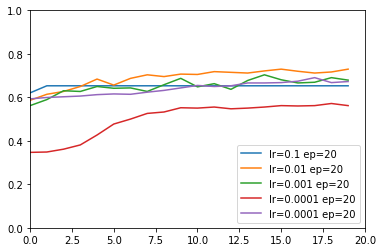

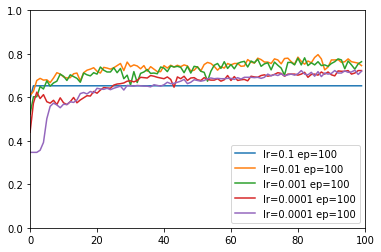

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

for ep in [10,20,50,100,200]:
    for lr in [0.1,0.01,0.001,0.0001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        plt.ylim(0,1)
        plt.xlim(0,ep)
        plt.plot(res['accuracy'],label='lr='+str(lr)+' ep='+str(ep))
        plt.legend()
    plt.show()    

In [32]:
import time ## increasing num_neurons
configs = [[4,4,4],[8,8,8],[16,16,16],[32,16,16],[16,32,32],[32,32,32],[64,64,64],[128,128,128]]
for conf in configs:
    model = model3h(conf)
    t0=time.time()
    res = train(model,lr=0.001,batch=32,epochs=50)
    t1=time.time() #I'm timing to check training time vs model size
    print(conf, '{:.3f}'.format(t1-t0), model.count_params(),np.argmax(res['accuracy']),'{:.3f}'.format(max(res['accuracy'])))

[4, 4, 4] 1.476 81 35 0.653
[8, 8, 8] 1.689 225 46 0.717
[16, 16, 16] 1.505 705 32 0.733
[32, 16, 16] 1.526 1105 33 0.754
[16, 32, 32] 1.760 1777 43 0.777
[32, 32, 32] 1.528 2433 44 0.764
[64, 64, 64] 1.625 8961 38 0.765
[128, 128, 128] 1.839 34305 47 0.782


In [37]:
def model_nlayer(n): #fixed num_neuron to 32
    model = Sequential()
    model.add(Dense(32,input_shape=(8,)))
    for i in range(n-1):
        model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

for nlayer in [1,3,5,7,9,11]:
    model = model_nlayer(nlayer)
    t0=time.time()
    res = train(model,lr=0.001,batch=32,epochs=50)
    t1=time.time() #I'm timing to check training time vs model size
    print(nlayer, '{:.3f}'.format(t1-t0), model.count_params(),np.argmax(res['accuracy']),'{:.3f}'.format(max(res['accuracy'])))

1 1.188 321 32 0.691
3 1.437 2433 32 0.752
5 1.753 4545 45 0.761
7 1.868 6657 45 0.772
9 2.242 8769 49 0.783
11 2.608 10881 48 0.816


## Check the test accuracy

In [39]:
def acc(yp, yt):
    assert yp.shape==yt.shape, 'shape of yp and yt do not match'
    return np.mean(yp == yt)

In [40]:
import tensorflow as tf # an alternative accuracy calculation (what Keras actually uses)

def acc_tf(yp, yt):
    assert yt.shape == yp.shape, "yp and yt shape do not match"
    sess = tf.InteractiveSession()
    acc = K.mean(K.equal(tf.convert_to_tensor(yt), tf.cast(K.round(tf.convert_to_tensor(yp)),dtype=tf.int64))).eval()
    return acc

In [41]:
# YOUR TURN
# print out the accuracy (another way to do it)
y_pred = model.predict(X_test)
Y_class = y_pred.reshape(Y_test.shape).round()
acc(Y_class, Y_test)
# Q5. Is the test accuracy as good as the train accuracy? 
# >> Nope

0.6818181818181818

In [43]:
for ep in [25,50,150]:
    model=model3h()
    adam = optimizers.Adam() 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    res = model.fit(X_train, Y_train, batch_size=32, epochs=25,verbose=0) #model.fit returns an object
    best_train_acc = max(res.history['accuracy']) #, which you can retrieve metrics if you chose a metric
    metric = model.evaluate(X_test, Y_test, batch_size=32, verbose=0) 
    print(ep, best_train_acc, metric[1])

25 0.723127 0.6688311696052551
50 0.72801304 0.6428571343421936
150 0.7296417 0.6363636255264282


## Monitor validation loss
You can also monitor validation loss and validation metric (accuracy in our example) by adding an option ` validation_split` to the `.fit()` function. 

In [45]:
# YOUR TURN
# Refer to Keras documentation and add validation_split to .fit() 
def model0():
    model = Sequential()
    model.add(Dense(16,input_shape=(8,)))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])    
    return model
model = model0()
res = model.fit(X_train, Y_train, validation_split=0.33, epochs=500, batch_size=32)
# Q6. What do you observe in train and validation accuraceis? Is there an overfit?
# >> validation accuracy saturates while train accuracy continues to improve
# Q7. Change your hyperparameters to maximize your validation accuracy. What are your best configuations?

Train on 411 samples, validate on 203 samples
Epoch 1/500
411/411 [==============================] - 0s 320us/step - loss: 1.7530 - accuracy: 0.5815 - val_loss: 0.8920 - val_accuracy: 0.6108
Epoch 2/500
411/411 [==============================] - 0s 59us/step - loss: 0.8908 - accuracy: 0.6010 - val_loss: 0.9164 - val_accuracy: 0.6355
Epoch 3/500
411/411 [==============================] - 0s 58us/step - loss: 0.9769 - accuracy: 0.5572 - val_loss: 0.7999 - val_accuracy: 0.6601
Epoch 4/500
411/411 [==============================] - 0s 74us/step - loss: 0.8051 - accuracy: 0.6058 - val_loss: 0.7421 - val_accuracy: 0.6059
Epoch 5/500
411/411 [==============================] - 0s 64us/step - loss: 0.8607 - accuracy: 0.6180 - val_loss: 0.7098 - val_accuracy: 0.6207
Epoch 6/500
411/411 [==============================] - 0s 74us/step - loss: 0.6839 - accuracy: 0.6229 - val_loss: 0.7209 - val_accuracy: 0.6158
Epoch 7/500
411/411 [==============================] - 0s 69us/step - loss: 0.6910 - accu

411/411 [==============================] - 0s 59us/step - loss: 0.5274 - accuracy: 0.7494 - val_loss: 0.6731 - val_accuracy: 0.6453
Epoch 58/500
411/411 [==============================] - 0s 60us/step - loss: 0.5542 - accuracy: 0.7445 - val_loss: 0.6121 - val_accuracy: 0.6749
Epoch 59/500
411/411 [==============================] - 0s 54us/step - loss: 0.5059 - accuracy: 0.7664 - val_loss: 0.6017 - val_accuracy: 0.7044
Epoch 60/500
411/411 [==============================] - 0s 58us/step - loss: 0.4931 - accuracy: 0.7835 - val_loss: 0.6079 - val_accuracy: 0.6798
Epoch 61/500
411/411 [==============================] - 0s 52us/step - loss: 0.4831 - accuracy: 0.7591 - val_loss: 0.6553 - val_accuracy: 0.6798
Epoch 62/500
411/411 [==============================] - 0s 52us/step - loss: 0.5206 - accuracy: 0.7324 - val_loss: 0.6155 - val_accuracy: 0.6847
Epoch 63/500
411/411 [==============================] - 0s 56us/step - loss: 0.4996 - accuracy: 0.7786 - val_loss: 0.6181 - val_accuracy: 0.684

411/411 [==============================] - 0s 52us/step - loss: 0.4552 - accuracy: 0.7908 - val_loss: 0.6047 - val_accuracy: 0.6995
Epoch 114/500
411/411 [==============================] - 0s 60us/step - loss: 0.4500 - accuracy: 0.7908 - val_loss: 0.6171 - val_accuracy: 0.6847
Epoch 115/500
411/411 [==============================] - 0s 56us/step - loss: 0.4434 - accuracy: 0.7835 - val_loss: 0.6251 - val_accuracy: 0.6749
Epoch 116/500
411/411 [==============================] - 0s 62us/step - loss: 0.5852 - accuracy: 0.7372 - val_loss: 0.7617 - val_accuracy: 0.6453
Epoch 117/500
411/411 [==============================] - 0s 54us/step - loss: 0.5541 - accuracy: 0.7445 - val_loss: 0.6819 - val_accuracy: 0.6749
Epoch 118/500
411/411 [==============================] - 0s 53us/step - loss: 0.4984 - accuracy: 0.7543 - val_loss: 0.6505 - val_accuracy: 0.6995
Epoch 119/500
411/411 [==============================] - 0s 51us/step - loss: 0.4903 - accuracy: 0.7421 - val_loss: 0.6475 - val_accuracy:

411/411 [==============================] - 0s 53us/step - loss: 0.4194 - accuracy: 0.8054 - val_loss: 0.5985 - val_accuracy: 0.6946
Epoch 170/500
411/411 [==============================] - 0s 56us/step - loss: 0.4137 - accuracy: 0.8248 - val_loss: 0.6722 - val_accuracy: 0.6798
Epoch 171/500
411/411 [==============================] - 0s 61us/step - loss: 0.4541 - accuracy: 0.8102 - val_loss: 0.6433 - val_accuracy: 0.7044
Epoch 172/500
411/411 [==============================] - 0s 66us/step - loss: 0.4290 - accuracy: 0.8127 - val_loss: 0.6340 - val_accuracy: 0.6946
Epoch 173/500
411/411 [==============================] - 0s 78us/step - loss: 0.4125 - accuracy: 0.8005 - val_loss: 0.6292 - val_accuracy: 0.6749
Epoch 174/500
411/411 [==============================] - 0s 69us/step - loss: 0.4481 - accuracy: 0.7786 - val_loss: 0.6405 - val_accuracy: 0.7192
Epoch 175/500
411/411 [==============================] - 0s 72us/step - loss: 0.4562 - accuracy: 0.7835 - val_loss: 0.6286 - val_accuracy:

411/411 [==============================] - 0s 70us/step - loss: 0.3959 - accuracy: 0.8078 - val_loss: 0.6345 - val_accuracy: 0.6995
Epoch 226/500
411/411 [==============================] - 0s 69us/step - loss: 0.4414 - accuracy: 0.8200 - val_loss: 0.6829 - val_accuracy: 0.6847
Epoch 227/500
411/411 [==============================] - 0s 63us/step - loss: 0.4296 - accuracy: 0.7932 - val_loss: 0.6675 - val_accuracy: 0.7094
Epoch 228/500
411/411 [==============================] - 0s 72us/step - loss: 0.4121 - accuracy: 0.8102 - val_loss: 0.6290 - val_accuracy: 0.7241
Epoch 229/500
411/411 [==============================] - 0s 69us/step - loss: 0.4060 - accuracy: 0.8297 - val_loss: 0.7598 - val_accuracy: 0.6798
Epoch 230/500
411/411 [==============================] - 0s 66us/step - loss: 0.4509 - accuracy: 0.8151 - val_loss: 0.6375 - val_accuracy: 0.7143
Epoch 231/500
411/411 [==============================] - 0s 66us/step - loss: 0.3849 - accuracy: 0.8102 - val_loss: 0.7445 - val_accuracy:

411/411 [==============================] - 0s 53us/step - loss: 0.3733 - accuracy: 0.8443 - val_loss: 0.6670 - val_accuracy: 0.7192
Epoch 282/500
411/411 [==============================] - 0s 53us/step - loss: 0.3840 - accuracy: 0.8200 - val_loss: 0.6704 - val_accuracy: 0.7044
Epoch 283/500
411/411 [==============================] - 0s 57us/step - loss: 0.3683 - accuracy: 0.8394 - val_loss: 0.6669 - val_accuracy: 0.6995
Epoch 284/500
411/411 [==============================] - 0s 54us/step - loss: 0.3829 - accuracy: 0.8321 - val_loss: 0.6487 - val_accuracy: 0.6946
Epoch 285/500
411/411 [==============================] - 0s 54us/step - loss: 0.3888 - accuracy: 0.8248 - val_loss: 0.6872 - val_accuracy: 0.7143
Epoch 286/500
411/411 [==============================] - 0s 64us/step - loss: 0.3523 - accuracy: 0.8394 - val_loss: 0.6806 - val_accuracy: 0.7241
Epoch 287/500
411/411 [==============================] - 0s 65us/step - loss: 0.3726 - accuracy: 0.8273 - val_loss: 0.6526 - val_accuracy:

411/411 [==============================] - 0s 63us/step - loss: 0.3510 - accuracy: 0.8370 - val_loss: 0.7705 - val_accuracy: 0.6995
Epoch 338/500
411/411 [==============================] - 0s 77us/step - loss: 0.4130 - accuracy: 0.8273 - val_loss: 0.6802 - val_accuracy: 0.6946
Epoch 339/500
411/411 [==============================] - 0s 80us/step - loss: 0.4035 - accuracy: 0.8394 - val_loss: 0.7715 - val_accuracy: 0.6700
Epoch 340/500
411/411 [==============================] - 0s 66us/step - loss: 0.3978 - accuracy: 0.8224 - val_loss: 0.7626 - val_accuracy: 0.7389
Epoch 341/500
411/411 [==============================] - 0s 70us/step - loss: 0.3717 - accuracy: 0.8418 - val_loss: 0.7887 - val_accuracy: 0.7241
Epoch 342/500
411/411 [==============================] - 0s 77us/step - loss: 0.4159 - accuracy: 0.7932 - val_loss: 0.7205 - val_accuracy: 0.6995
Epoch 343/500
411/411 [==============================] - 0s 64us/step - loss: 0.3833 - accuracy: 0.8321 - val_loss: 0.7181 - val_accuracy:

411/411 [==============================] - 0s 71us/step - loss: 0.3543 - accuracy: 0.8321 - val_loss: 0.7374 - val_accuracy: 0.7044
Epoch 394/500
411/411 [==============================] - 0s 70us/step - loss: 0.3259 - accuracy: 0.8540 - val_loss: 0.7420 - val_accuracy: 0.6995
Epoch 395/500
411/411 [==============================] - 0s 63us/step - loss: 0.3400 - accuracy: 0.8491 - val_loss: 0.7159 - val_accuracy: 0.7192
Epoch 396/500
411/411 [==============================] - 0s 59us/step - loss: 0.3294 - accuracy: 0.8467 - val_loss: 0.7352 - val_accuracy: 0.7389
Epoch 397/500
411/411 [==============================] - 0s 76us/step - loss: 0.3149 - accuracy: 0.8564 - val_loss: 0.7092 - val_accuracy: 0.7143
Epoch 398/500
411/411 [==============================] - 0s 74us/step - loss: 0.3134 - accuracy: 0.8686 - val_loss: 0.7063 - val_accuracy: 0.7094
Epoch 399/500
411/411 [==============================] - 0s 62us/step - loss: 0.3191 - accuracy: 0.8564 - val_loss: 0.7088 - val_accuracy:

411/411 [==============================] - 0s 56us/step - loss: 0.3106 - accuracy: 0.8564 - val_loss: 0.7382 - val_accuracy: 0.7143
Epoch 450/500
411/411 [==============================] - 0s 60us/step - loss: 0.3302 - accuracy: 0.8637 - val_loss: 0.8475 - val_accuracy: 0.7192
Epoch 451/500
411/411 [==============================] - 0s 58us/step - loss: 0.3488 - accuracy: 0.8516 - val_loss: 0.8240 - val_accuracy: 0.7192
Epoch 452/500
411/411 [==============================] - 0s 59us/step - loss: 0.3517 - accuracy: 0.8443 - val_loss: 0.7971 - val_accuracy: 0.7143
Epoch 453/500
411/411 [==============================] - 0s 54us/step - loss: 0.3193 - accuracy: 0.8516 - val_loss: 0.7532 - val_accuracy: 0.6946
Epoch 454/500
411/411 [==============================] - 0s 59us/step - loss: 0.3188 - accuracy: 0.8467 - val_loss: 0.7800 - val_accuracy: 0.6995
Epoch 455/500
411/411 [==============================] - 0s 52us/step - loss: 0.3106 - accuracy: 0.8613 - val_loss: 0.7707 - val_accuracy:

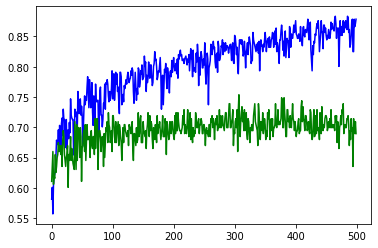

In [46]:
plt.plot(res.history['accuracy'],'b')
plt.plot(res.history['val_accuracy'],'g')

In [47]:
def train_val(model, lr=0.001, batch=32, epochs=20): # runtraining with validation holdout
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs,validation_split=0.2, verbose=0)
    return result.history, model

def runeval(model):    
    t0=time.time()
    res, model = train_val(model,lr=0.001,batch=32,epochs=500)
    t1=time.time() #I'm timing to check training time vs model size
    metric = model.evaluate(X_test, Y_test, batch_size=32, verbose=0) 
    print(nlayer, '{:.3f}'.format(t1-t0), model.count_params(),'acc_max_tr:','{:.3f}'.format(max(res['accuracy'])),'acc_max_val:','{:.3f}'.format(max(res['val_accuracy'])),'@',np.argmax(res['val_accuracy']),'acc_test:',metric[1])

for nlayer in [1,5,10,20,50]:
    model = model_nlayer(nlayer)
    runeval(model)

# conclusion: shallow models perform as well as deep ones within 500 epochs when n_neuron=32 for all layers and other hyperparameters
# but the model was trained for long epoch, so it might have passed its optimal point
# We'll see if early stopping helps

1 8.500 321 acc_max_tr: 0.784 acc_max_val: 0.789 @ 358 acc_test: 0.6883116960525513
5 10.814 4545 acc_max_tr: 0.982 acc_max_val: 0.805 @ 154 acc_test: 0.7077922224998474
10 13.278 9825 acc_max_tr: 0.994 acc_max_val: 0.846 @ 71 acc_test: 0.7207792401313782
20 19.370 20385 acc_max_tr: 0.978 acc_max_val: 0.829 @ 200 acc_test: 0.7142857313156128
50 38.524 52065 acc_max_tr: 0.949 acc_max_val: 0.789 @ 137 acc_test: 0.6688311696052551


In [48]:
from keras.callbacks import EarlyStopping
def train_ES(model, lr=0.001, batch=64, epochs=20): # runtraining with validation holdout
    earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=50, verbose=1, mode='auto')
    callbacks_list = [earlystop]
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, validation_split=0.2, verbose=0, callbacks=callbacks_list)
    return result.history, model



In [51]:
def evalES(model):    
    t0=time.time()
    res, model = train_ES(model,lr=0.001,batch=64,epochs=500)
    t1=time.time() #I'm timing to check training time vs model size
    metric = model.evaluate(X_test, Y_test, batch_size=32, verbose=0) 
    print(nlayer, '{:.3f}'.format(t1-t0), model.count_params(),'acc_max_tr:','{:.3f}'.format(max(res['accuracy'])),'acc_max_val:','{:.3f}'.format(max(res['val_accuracy'])),'@',np.argmax(res['val_accuracy']),'acc_test:',metric[1])

In [52]:
for nlayer in [1,5,10,20,50]:
    model = model_nlayer(nlayer)
    evalES(model)

1 4.866 321 acc_max_tr: 0.780 acc_max_val: 0.789 @ 493 acc_test: 0.7207792401313782
5 6.010 4545 acc_max_tr: 0.980 acc_max_val: 0.789 @ 174 acc_test: 0.6233766078948975
10 7.576 9825 acc_max_tr: 1.000 acc_max_val: 0.837 @ 317 acc_test: 0.7077922224998474
20 12.229 20385 acc_max_tr: 0.982 acc_max_val: 0.821 @ 291 acc_test: 0.7207792401313782
50 22.052 52065 acc_max_tr: 0.923 acc_max_val: 0.821 @ 368 acc_test: 0.6818181872367859


In [53]:
# repeating to see the stability (seems it fluctuates a bit)
for nlayer in [1,3,5,10,20,50]:
    model = model_nlayer(nlayer)
    evalES(model)
# Early stop may not work well always. It needs tuning for tolerance (min_delta and patience)    

1 4.929 321 acc_max_tr: 0.780 acc_max_val: 0.772 @ 308 acc_test: 0.7727272510528564
3 6.701 2433 acc_max_tr: 0.888 acc_max_val: 0.789 @ 247 acc_test: 0.6753246784210205
5 7.650 4545 acc_max_tr: 0.963 acc_max_val: 0.805 @ 199 acc_test: 0.6753246784210205
10 8.749 9825 acc_max_tr: 0.998 acc_max_val: 0.805 @ 111 acc_test: 0.7077922224998474
20 12.845 20385 acc_max_tr: 0.996 acc_max_val: 0.805 @ 77 acc_test: 0.6818181872367859
50 22.802 52065 acc_max_tr: 0.947 acc_max_val: 0.805 @ 312 acc_test: 0.6623376607894897
